Note: We need to Change the class names of the DIV, SPANS and other ELEMENTS in our code because the Jobstreet Website constantly changes its "class names" to prevent web scraping 

MAKE NEW ENVIRONMENT that will contain the libraries for this code to function

In [1]:
import requests 
from bs4 import BeautifulSoup

In [2]:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
# The code "requests.packages.urllib3.disable_warnings(InsecureRequestWarning) disables the InsecureRequestWarning warning.""Activity #4 - Linear Regression.pdf"

In [4]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/50.0'}
#This code creates a dictionary of HTTP headers. The User-Agent header is used to identify the user agent of the client making the request. In this case, the user agent is set to Mozilla Firefox 50.0.

In [5]:
import cloudscraper
# A simple Python module to bypass Cloudflare's anti-bot page (also known as "I'm Under Attack Mode", or IUAM), implemented with Requests. 
# This can be useful if you wish to scrape or crawl a website protected with Cloudflare.

In [6]:
scraper = cloudscraper.create_scraper(browser = 'chrome')
# this code allows you to scrape websites that would otherwise be blocked by Cloudflare.
# specify the browser that the CloudScraper object should use

In [7]:
import csv # The csv module implements classes to read and write tabular data in CSV format.
from csv import writer # This line of code imports the writer class from the csv module.
import re # This module provides regular expression matching operations
import urllib.parse  
# This module provides a standard interface to break Uniform Resource Locator (URL) strings 
# in components or to combine the components back into a URL string. 
# It also has functions to convert a "relative URL" to an absolute URL given a "base URL."

***

# Data Scraping
- https://www.jobstreet.com.ph/en/job-search/junior-developer-jobs/
- https://www.jobstreet.com.ph/en/job-search/senior-developer-jobs/

In [8]:
url_link_JrDev = 'https://www.jobstreet.com.ph/en/job-search/junior-developer-jobs/'
s_res = scraper.get(url_link_JrDev).text
soup = BeautifulSoup(s_res,'html.parser')
# the lines of code are used to extract data from the website 'https://www.jobstreet.com.ph/en/job-search/junior-developer-jobs/'

In [9]:
# class_="z1s6m00" contains all the divs of the different Companies and the Job Positions they are hiring 
allResults_ = soup.find("div",class_="z1s6m00")# this variable will find divs that contains Jobs from different companies

****

***


In [10]:
def scrape_data(url):  
    i = 1  # i represents the page number
    steps = 5 # represents the number of times the 

    while i <= steps: # as long as i is less or equal to the number if steps the while loop will continue iterating 
        temp = i # 'temp' will be the copy of variable 'i' 
        url_with_page = url + '?pg=' + str(temp) # will represent the current page the code is craping data from
        response = requests.get(url_with_page).text
        soup = BeautifulSoup(response, 'html.parser')

        with open('Jobstreet.csv', 'a', newline='', encoding='utf-8') as csvfile:
            csvwriter = csv.writer(csvfile)

            company_divs = soup.find_all("div", class_='z1s6m00 _1hbhsw65a _1hbhsw6ga _1hbhsw6n _1hbhsw60 _1hbhsw662')

            for div in company_divs:
                job = div.find('span', class_="z1s6m00").text.replace('\n', '').lower() # will find the span containing the Job Position

                spans_salary = div.find_all('span', class_="z1s6m00 _1hbhsw64y y44q7i0 y44q7i3 y44q7i21 y44q7ih") 
                '''will find all the spans that may contain the salary.
                some spans with class_="z1s6m00 _1hbhsw64y y44q7i0 y44q7i3 y44q7i21 y44q7ih" may not contain salary. 
                the next snippet will deal with this obstacle'''

                for span in spans_salary: 
                    if re.search(r'\bmonthly\b', span.text): 
                        '''the code will only scrape the data that contains the word "monthly". 
                        "monthly" is not present then it will not scrape the data '''

                        salary_str = re.findall(r'\S+\s*\S+', span.text)[0] 
                        salary_str = re.sub(r'[^\d\.]', '', salary_str)
                        salary = float(salary_str) * 1000
                        #This code snippet will convert salaries like Php15k or Php50k strings into 15000.0 or 50000.0 floats

                        link = div.find("a") 
                        link = link['href']
                        # these lines code will be used to find the Relative URL present in the div 

                        base_url = "https://www.jobstreet.com.ph"
                        link = urllib.parse.urljoin(base_url, link) # this code is used to join the base_url with the relative 

                        hyperlink_response = requests.get(link, timeout=5)
                        hyperlink_soup = BeautifulSoup(hyperlink_response.content, "html.parser")
                        '''this code snippet will make a request to the URL link using the new Base_Url. 
                        timeout argument specifies the amount of time to wait for the request to complete. 
                        If the request does not complete within the specified time, the request will be aborted
                        then BeautifulSoup will extract data from the HTML pages.'''


                        #'''After the request has been sent and rthe code will scrape the data in the new hyperlink'''
                        experiences_spans = hyperlink_soup.find_all('span', class_="z1s6m00 _1hbhsw64y y44q7i0 y44q7i1 y44q7i21 _1d0g9qk4 y44q7ia")
                        for x in experiences_spans:
                            if re.search(r'\byears\b', x.text):
                                ''''the code will only scrape the data that contains the word "years". 
                                "years" is not present then it will not scrape the data '''
                                experience = re.findall(r'\S+\s*\S+', x.text)[0]
                                experience = re.sub(r'[^\d\.]', '', experience)

                                csvwriter.writerow([job, salary, link, experience]) # this line of code will write all the data scraped into 'Jobstreet.csv'

        print("Page", i, "& step", steps, "\n")
        i += 1


In [11]:
with open('Jobstreet.csv', 'a', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Job', 'Salary', 'URLs', 'Experience'])

# The lines of code are used to write the column names of 'Job', 'Salary', 'URLs', 
# 'Experience' into the .csv file  Jobstreet.csv
#Experience Column is in years. Example 2.0 means 2 years

" The lines of code are used to write the column names of 'Job', 'Salary', 'URLs', \n'Experience' into the .csv file  Jobstreet.csv"

In [14]:
url_link_JrDev = 'https://www.jobstreet.com.ph/en/job-search/junior-developer-jobs/'
scrape_data(url_link_JrDev)

Page 1 & step 5 

Page 2 & step 5 

Page 3 & step 5 

Page 4 & step 5 

Page 5 & step 5 



****

In [26]:
url_link_SrDev = 'https://www.jobstreet.com.ph/en/job-search/senior-developer-jobs/'
url_link_PM = 'https://www.jobstreet.com.ph/en/job-search/project-manager-jobs/'
url_link_CTO = 'https://www.jobstreet.com.ph/en/job-search/cto-jobs/'

In [27]:
s_res = scraper.get(url_link_SrDev).text
soup = BeautifulSoup(s_res,'html.parser')
scrape_data(url_link_SrDev)

Page 1 & step 5 

Page 2 & step 5 

Page 3 & step 5 

Page 4 & step 5 

Page 5 & step 5 



In [28]:
s_res = scraper.get(url_link_PM).text
soup = BeautifulSoup(s_res,'html.parser')
scrape_data(url_link_PM)

Page 1 & step 5 

Page 2 & step 5 

Page 3 & step 5 

Page 4 & step 5 

Page 5 & step 5 



In [29]:
s_res = scraper.get(url_link_CTO).text
soup = BeautifulSoup(s_res,'html.parser')
scrape_data(url_link_CTO)

Page 1 & step 5 

Page 2 & step 5 

Page 3 & step 5 

Page 4 & step 5 

Page 5 & step 5 



***

# Linear Regression

In [30]:
import pandas as pd

In [31]:
# this will show the dataset used for linear regression
dataset = pd.read_csv('Jobstreet.csv') 
dataset

,Job,Salary,URLs,Experience
0,junior programmer,15000.0,https://www.jobstreet.com.ph/en/job/junior-pro...,2.0
1,junior back end developer (go language),45000.0,https://www.jobstreet.com.ph/en/job/junior-bac...,3.0
2,software engineer (back-end),79000.0,https://www.jobstreet.com.ph/en/job/software-e...,3.0
3,software developer (australian client),80000.0,https://www.jobstreet.com.ph/en/job/software-d...,3.0
4,software engineer,30000.0,https://www.jobstreet.com.ph/en/job/software-e...,2.0
...,...,...,...,...
124,"bookkeeper | wfh, night-shift | up to php30k",25000.0,https://www.jobstreet.com.ph/en/job/bookkeeper...,2.0
125,"multimedia designer | full-remote, night-shift...",30000.0,https://www.jobstreet.com.ph/en/job/multimedia...,4.0
126,"visual media ad specialist | wfh, night-shift ...",40000.0,https://www.jobstreet.com.ph/en/job/visual-med...,4.0
127,"construction project coordinator | wfh (cebu),...",45000.0,https://www.jobstreet.com.ph/en/job/constructi...,4.0


In [32]:
dataset2 = dataset.copy() # to make a copy of the dataset. We can alter the copied dataset as many times we want

dataset2['Job'] = dataset2['Job'].astype(str)
print(type(dataset2['Job']))

<class 'pandas.core.series.Series'>


In [33]:
# Define the regular expressions to match the job titles

junior_regex = r'\bjunior\b'
senior_regex = r'\bsenior developer\b|\bdeveloper\b|\bengineer\b|\bprogrammer\b'
pm_regex = r'\bproject manager\b'

''' Define a lambda function to replace the job titles with 0, 1, 2, or 3
0 == Junior Developer
1 == Senior Developer
2 == Project Manager
3 == titles that don't match the previous examples'''
replace_func = lambda x: 0 if re.search(junior_regex, x) else 1 if re.search(senior_regex, x) else 2 if re.search(pm_regex, x) else 3

# Apply the lambda function to the Job column and assign the result to a new column
dataset2['Job'] = dataset2['Job'].apply(replace_func)

In [37]:
dataset2

,Job,Salary,URLs,Experience
0,0,15000.0,https://www.jobstreet.com.ph/en/job/junior-pro...,2.0
1,0,45000.0,https://www.jobstreet.com.ph/en/job/junior-bac...,3.0
2,1,79000.0,https://www.jobstreet.com.ph/en/job/software-e...,3.0
3,1,80000.0,https://www.jobstreet.com.ph/en/job/software-d...,3.0
4,1,30000.0,https://www.jobstreet.com.ph/en/job/software-e...,2.0
5,1,60000.0,https://www.jobstreet.com.ph/en/job/developer-...,4.0
6,1,55000.0,https://www.jobstreet.com.ph/en/job/programmer...,2.0
7,1,40000.0,https://www.jobstreet.com.ph/en/job/software-d...,2.0
8,0,35000.0,https://www.jobstreet.com.ph/en/job/oracle-dev...,2.0
9,1,35000.0,https://www.jobstreet.com.ph/en/job/software-d...,5.0


# Data Splitting

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np

In [38]:
df = dataset2.copy()

In [40]:
X = df.iloc[:, 0:2] # the X variable is the first and second columns
y = df.iloc[:, -1] # the y variable is the last column

In [41]:
X

,Job,Salary
0,0,15000.0
1,0,45000.0
2,1,79000.0
3,1,80000.0
4,1,30000.0
5,1,60000.0
6,1,55000.0
7,1,40000.0
8,0,35000.0
9,1,35000.0


In [42]:
y

0       2.0
1       3.0
2       3.0
3       3.0
4       2.0
5       4.0
6       2.0
7       2.0
8       2.0
9       5.0
10      3.0
11      2.0
12      3.0
13      3.0
14      2.0
15      2.0
16      3.0
17      2.0
18      2.0
19      4.0
20      3.0
21      3.0
22      2.0
23      5.0
24      5.0
25      3.0
26      3.0
27      3.0
28      3.0
29      3.0
30      3.0
31      3.0
32      6.0
33      2.0
34      3.0
35      5.0
36      5.0
37      5.0
38      NaN
39      8.0
40      5.0
41      5.0
42      5.0
43      5.0
44      3.0
45      7.0
46      5.0
47      7.0
48      5.0
49      5.0
50      5.0
51      7.0
52      5.0
53      3.0
54      5.0
55      4.0
56      5.0
57      5.0
58     10.0
59      5.0
60      5.0
61      5.0
62      5.0
63      5.0
64      3.0
65      3.0
66      5.0
67      5.0
68      2.0
69      5.0
70      5.0
71      6.0
72      5.0
73      5.0
74      6.0
75      5.0
76      4.0
77     15.0
78      8.0
79      2.0
80      8.0
81      5.0
82      5.0
83  

In [56]:
df = pd.read_csv('Jobstreet.csv', usecols=['Experience'])

# Find the mean of the column.
mean = df['Experience'].mean()

# Replace the empty rows with the mean.
df['Experience'].fillna(mean, inplace=True)

# Print the modified DataFrame.
print(df)

     Experience
0      2.000000
1      3.000000
2      3.000000
3      3.000000
4      2.000000
5      4.000000
6      2.000000
7      2.000000
8      2.000000
9      5.000000
10     3.000000
11     2.000000
12     3.000000
13     3.000000
14     2.000000
15     2.000000
16     3.000000
17     2.000000
18     2.000000
19     4.000000
20     3.000000
21     3.000000
22     2.000000
23     5.000000
24     5.000000
25     3.000000
26     3.000000
27     3.000000
28     3.000000
29     3.000000
30     3.000000
31     3.000000
32     6.000000
33     2.000000
34     3.000000
35     5.000000
36     5.000000
37     5.000000
38     4.304688
39     8.000000
40     5.000000
41     5.000000
42     5.000000
43     5.000000
44     3.000000
45     7.000000
46     5.000000
47     7.000000
48     5.000000
49     5.000000
50     5.000000
51     7.000000
52     5.000000
53     3.000000
54     5.000000
55     4.000000
56     5.000000
57     5.000000
58    10.000000
59     5.000000
60     5.000000
61     5

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [59]:
X_train = np.array(X_train).reshape((len(X_train),2))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape((len(X_test),2))
y_test = np.array(y_test).reshape((len(y_test),1))

# Model Training

In [45]:
from sklearn import linear_model 

In [60]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train) 
#this snippet of code will be used to train the linearRegression model using the X and y variables.

LinearRegression()

In [61]:
model.intercept_

array([2.50499862])

In [62]:
model.coef_

array([[3.67660377e-01, 1.73786315e-05]])

In [63]:
model.score(X_train,y_train)

0.20831275159886953

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([[4.43673584],
       [4.17605637],
       [2.86994988],
       [4.43673584],
       [4.47691133],
       [4.26294952],
       [4.61052215],
       [3.95555239],
       [4.97818253],
       [4.61052215],
       [4.45682358],
       [3.74159058],
       [4.95809478],
       [3.39401795],
       [4.28303727],
       [4.80439622],
       [4.34984268],
       [5.32575516],
       [3.28703704],
       [3.20014388],
       [3.65469742],
       [3.91537689],
       [4.16409596],
       [2.85257125],
       [4.04244554],
       [4.95809478],
       [4.43673584],
       [3.67478517],
       [4.34984268],
       [2.7656781 ],
       [3.65469742],
       [4.00227005],
       [4.39001817],
       [4.43673584],
       [4.22819226],
       [3.95555239],
       [4.6306099 ],
       [3.56780426],
       [4.30312502]])

# Plot

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

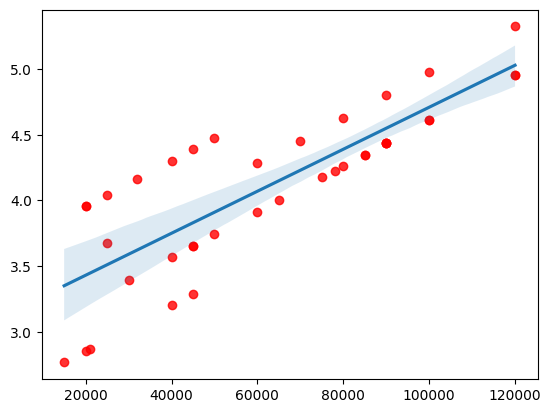

In [67]:
plt.figure(10.5)
sns.regplot(x=X_test[:,1], y = y_pred, scatter_kws={'color':'red'})

In [68]:
plt.show()

***


# Save Model

In [69]:
import pickle

In [70]:
pickle.dump(model, open('model.pkl','wb'))

In [71]:
model_dump = pickle.load(open('model.pkl','rb'))

In [72]:
print(model.predict([[1.2,100]]))

[[2.94792894]]
